### Задача 1 (1 балл)

Руководитель продукта, у которого имеется АБ-платформа, хочет выяснить, стоит ли инвестировать ресурсы в ускорение своего продукта. Как ему сделать это с минимальными трудозатратами?

### Ответ
* можно попробовать замедлить продукт (это проще, чем тратить ресурсы на ускорение) и провести ухудшающий АБ-тест, чтобы понять важность скорости продукта для пользователей, а также сделать выводы, как скорость продукта влияет на ключевые метрики
* в целом, имеет смысл посмотреть на разные степени замедления продукта: возможно, зависимость метрик от скорости продукта будет не линейная. вообще, ожидаемо, что при низких скоростях работы продукта улучшения будут более важны, а когда продукт уже работает достаточно быстро, то дальнейшее ускорение пользователи могут даже не почувствовать
* но важно понимать, что, наоборот, если продукт сейчас работает уже очень медленно, то АБ-эксперимент может не показать разницы, потому что пользователи также могут не почувствовать изменение


### Задача 2 (2 балла)

Аналитик решил протестировать два вида баннеров A и B. По ходу АБ-эксперимента по n пользователей увидело баннер А и B. В группе A конверсия составила 56%, а в группе B 59%. При каких n можно считать, что в группе B на уровне значимости в 0.1% действительно выше конверсия?

### Ответ
Воспользовалась калькулятором размера выборки для АБ-эксперимента: https://www.abtasty.com/sample-size-calculator/
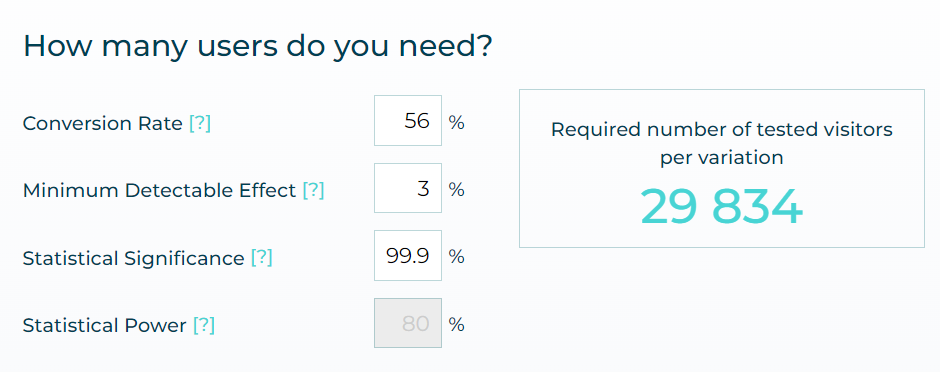

Таким образом для каждой группы АБ-теста нужно 29834 пользователей, чтобы с заданной значимостью заметить увеличение конверсии.


Можно расчитать это значение по формуле, исходя из того, что мы применяем Z-тест.   
Стандартное отклонение мы оцениваем как ([источник](https://incredible.ai/statistics/2019/06/28/AB_Testing/#161-p-value-with-t-test)):   
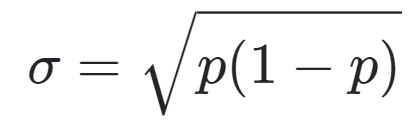  
Формула для расчета n ([источник](https://towardsdatascience.com/probing-into-minimum-sample-size-formula-derivation-and-usage-8db9a556280b)):   
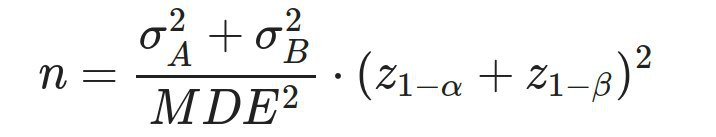

In [1]:
from scipy import stats

p_a = 0.56 # конверсия
p_b = 0.59
sd_a = (p_a*(1 - p_a))**0.5
sd_b = (p_b*(1 - p_b))**0.5
mde = 0.03
alpha = 0.001
beta = 0.2
n = ((sd_a**2 + sd_b**2) *(stats.norm.ppf(1-alpha) + stats.norm.ppf(1-beta))**2)/mde**2
print(f'Количество пользователей в каждой группе должно быть: {int(n/2)}')

Количество пользователей в каждой группе должно быть: 4193


Отличие между значениями получилось значительным. Возможно, калькулятор исползует в основе другую формулу и/или иначе оценивает стандартное отклонение

### Задача 3 (3 балла)

Аналитик собирается провести эксперимент с добавлением фичи на 14 дней с p-value 5%. То есть в 5% случаев, если на самом деле нет изменений, то фичу будут выкатывать. Аналитик очень нетерпеливый, и любит [подглядывать](https://gopractice.ru/data/how-not-to-analyze-abtests) (рассчитывает стат. значимость каждый день эксперимента). Как только в какой-то день p-value оказывается ниже 5%, он собирается остановить эксперимент и выкатить фичу.

* Посчитайте 99% доверительный интервал для количества AA экспериментов из 1000, которые должны иметь p-value 5%. (1 балл)
* Посчитайте на синтетическом примере в какой доле AA экспериментов аналитик отвергнет нулевую гипотезу, если будет подглядывать. Другими словами какая реальная ошибка первого рода. (1 балл) 
* Какое p-value нужно использовать при "подглядывании", чтобы итоговая ошибка первого рода составила 5%? (1 балл)

0.063

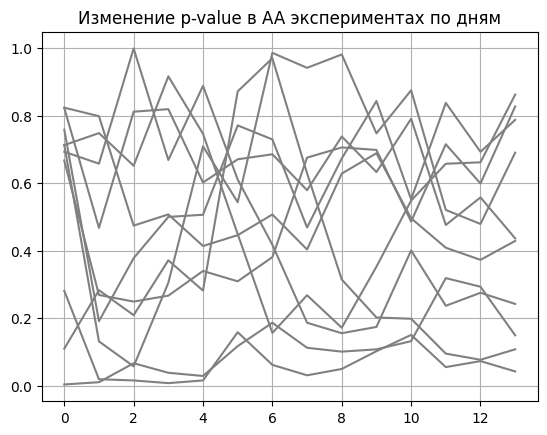

In [2]:
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np

p_value_bound = 0.05
np.random.seed(182)

def generate_p_values_by_day(N=1000, samples_per_day=100, days=14):
    data = []

    for i in range(N):
        test = np.array([])
        control = np.array([])
        p_values = []
        for day in range(days):
            test = np.hstack([test, np.random.randn(samples_per_day)])
            control = np.hstack([control, np.random.randn(samples_per_day)])
            p_value = ttest_ind(test, control, equal_var=False).pvalue
            p_values.append(p_value)
        data.append(p_values)
        
    return pd.DataFrame(data).T

df = generate_p_values_by_day()
df[list(range(10))].plot(legend=False, color='grey', grid=True, title='Изменение p-value в AA экспериментах по дням')
(df.loc[13] < p_value_bound).sum() / df.shape[1]

В примере выше запускается 1000 AA экспериментов. В 0.063 доле случаев на 14 день p-value оказывается меньше 5%.

### Ответ (подпункт 1)
Будем считать доверительный интервал для доли.
[Источник](http://yandex.kz/clck/jsredir?from=yandex.kz%3Bsearch%2F%3Bweb%3B%3B&text=&etext=2202.Itr2meBB2Kmbw_F4DGljFyO2DewtVe68kzU6rGOfZLprRvonbZsF0UstByfZ9uABpaVqHD1EBMYQj999qv727sOq2I1TqA5P18v7qr0x_Z1wcXpueHlrcGxoa3d3a3Zq.439829935417f756c98d11474fb1ee0af36e6706&uuid=&state=RsWHKQP_fPE,&&cst=AxbTlK7nwx6hOtlFEVBANtLDR197jb6z4hb57_qorp5MS6I7ARNU-S7GHxgnEDeeZTUsENF_2erupgHk0ek5T3jU3HZmrxbNCel15o33uN6nXSZXrAJ8fGNrSug8MQ-wPrlivu_zt7UgRMDwBJWeKYlFgApK1ib0NtVB2dKKgYwZsOJIFzlAnkAwNy84D2EiyyiZbmfi917SXWLpvjnUwNQk_eiK0vg8EKKSIOEBBuD3jHHncqXAM5EOqF62sZggt8wE5j3gGE2svTeEHBD9TbOOGLs8BekzGsw41oTsR2Z1dK3LPLCyKCsYPEXZ-ogWxCTrp7mE2OXGIgiX8af1nCxHHP1TLhIiuCSqZRM2G1PlrymJexpTsqNKgAzQdKywtEVeaKK2OaLlH3ObdVsAuBmrp0o9ISqedypOGhoQDiksZCt_nj9T0797mA1LqozWB82ry2Tz3nG07TbcF99UxV_YmxZ_9v71s6nTT8BZ5BEhZiQLu1uPHkLqaDg59JmbJHeLAtntU33owCj6XbIJFPK4HtnkIsCCyYVfXGNZkK4gYfAQF8pb1S-Vai7kZ8q2ExUdQwBX85T2R0CfJq-vmG3sUo8s0Ne7IKr7iLgXappB5hwfcRFjCSQwP4DbB77NPj9ajG3N59rwu-pdaubrCVMOkr1hDB6C2lRvA2e0CqMK0u66Gy8GSAT4bmficEOrcy-Fe2QxaFRUy1V1GjT96ZFat-SQwpaAftEyaQf_ZF39jSxqblbE_9qb38NE7IcW7CH0yQ3dISmU5e0Q_IEDRr178VxMPLzSKU5_2XnDFvfquf7yC2VnEgorjAwlFHc_czPOTXKsGp9gkoTN0ILnf1d_Yy6z_AROoG1996gjIzpGT4fm0glpUk8w36Ao8k8GZS_KnwUUkb9js5W4uMN76f2_nOezEbUipILpDuGGIX4_lrksqxqM6LZg5BmNVOSqKsO9HJU5lRuwUZYyviIWld9QwKOlrvi1YgCHtCSYRQgxPfVh45V1pWHRr27ZWtH9_4LAkfzkXEVKXEztqbIeaE7szF7vEw7FgbDZ0YHdLPeQjhkFXIHtSSEknXsqDxMDa5K-upaRCFZholRNEQ8Z6n-FY9z0j6TFMYlkfP54lOCvwTIISs8mLTT6SE1A51ldjzRwq0B6vR4VxKYK3KDnyr4a_QT1DhY2nb8KdxVUIUA8ts7rC_xSiovjTAWzIdTp-smmkjO9OPIJfVuBDW1W-VcRyii6M2E6ByawWDNOqzZhKktCwRiZZ9DqmkdT8GWenDjutpZCaGa8mHslX0zQZP2eXhhPsZ4ffVoEK3kSEq9oq83Mtk_D9JrKZVaSRzk8n6Z5ifvuPt0,&data=VzFITjJTUER3MkJzV3gxaVE5SWg0algzbWxwLVhkeWpaQzRWUmYxd3BLZDF6R0NNMFB1N3AwY0pBbV8xUGU0eXNJbzZJazdJTUdWd0pjUHoxYjQzV3pPMzVmNF8xRlpBNzVoZVVUNlI2WUxxREV2aWIwc2RURUhseVo0cGs4VFRCa0w5dUVURHlHRVlZUnFpa2U3SEF3LCw,&sign=4d90c39c8d74a25cd66797e8103d23e0&keyno=WEB_0&b64e=2&ref=mag21uLwzH9y-hpgvm7dkpUd03lWsiVqgHeEFrOH5Dl8lhcHZik95SbJZvi2Ox4-TeTlrMvAsxkPDKoVZn1_9SRyRH4defJsIIb8KVkKSWqEW6vQ5_2I7FIotZVGIacPQGPYpAvLzAHLoKJMLiJNYeXtRvrbiISsOMZysrdeT4P7Mk3EtBQr-8kga5J3QlSZytAaAwci-LWNI7jhRwCzJVQb6pYq9KWeZdyVK78-5Hh4TanBzTDo7JtAAiIaeST71pO9hUYk2haME1_UHX-qbB-VqS3P3Yh9&l10n=ru&cts=1685962044818%40%40events%3D%5B%7B%22event%22%3A%22click%22%2C%22id%22%3A%222_fs1ww02-01%22%2C%22cts%22%3A1685962044818%2C%22fast%22%3A%7B%22organic%22%3A1%7D%2C%22service%22%3A%22web%22%2C%22event-id%22%3A%22liiq9riqeg%22%7D%5D&mc=3.690116517593666&hdtime=73522.2) 

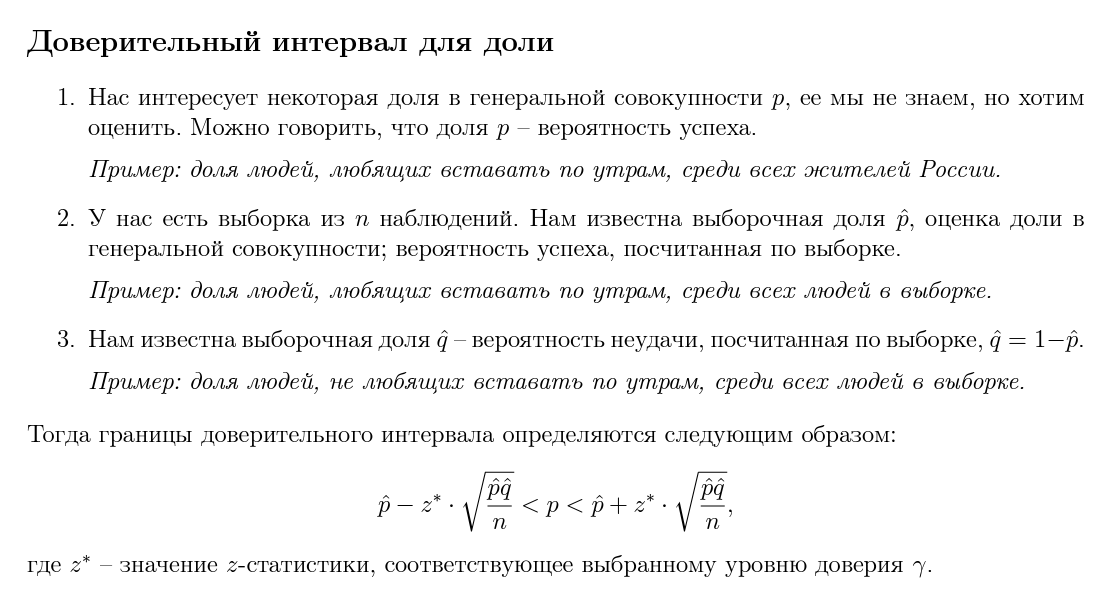

In [3]:
# полагаю, что задание подразумевает долю экспериментов, где p-value меньше 5%
p = 0.05 # доля экспериментов, с p-value меньше 5% равна 5% в силу того, что у p-value равномерное распределение при верной H0 (что и есть в АА-тесте)
q = 1 - p

s = np.sqrt(p*q/1000) # средняя ошибка выборки для доли р
z = 2.575
print(f'Доверительный интервал для доли экспериментов, где p-value меньше 5%: ({round(p-z*s, 4)}, {round(p+z*s, 4)})')

Доверительный интервал для доли экспериментов, где p-value меньше 5%: (0.0323, 0.0677)


In [4]:
# если в задании подразумевался доверительный интервал, для доли тестов, где значение p-value, наоборот, больше 5%, то:
print(f'Доверительный интервал для доли экспериментов, где p-value больше 5%: ({round(q-z*s, 4)}, {round(q+z*s, 4)})')

Доверительный интервал для доли экспериментов, где p-value больше 5%: (0.9323, 0.9677)


### Ответ (подпункт 2)

In [5]:
# Доля АА-экспериментов, на которых аналитик отвергнет нулевую гипотезу. 
# Для каждого из 1000 экспериментов, смотрим, был ли день, когда p-value оказывался меньше 5%, считаем количество таких экспериментов (где хотя бы в один день p-value < 0.05) и делим на 1000
print(f'Реальная ошибка первого рода: {((df < 0.05).sum() > 0).sum()/1000}')

Реальная ошибка первого рода: 0.244


### Ответ (подпункт 3)

In [6]:
# Чтобы узнать, какое p-value нужно использовать при "подглядывании", можем оценить его на наших данных
p_value_bound = 0.05
while True:
  share = ((df < p_value_bound).sum() > 0).sum()/1000
  if share <= 0.05:
    print(f'p-value, которое нужно использовать при "подглядывании", чтобы итоговая ошибка первого рода составила 5%: {round(p_value_bound, 4)}')
    break
  p_value_bound -= 0.001


p-value, которое нужно использовать при "подглядывании", чтобы итоговая ошибка первого рода составила 5%: 0.007


### Задача 4 (3 балла)

Будем называть чувствительностью метрики долю экспериментов со стат. значимым изменением метрики. В синтетическом примере ниже среди 1000 AB тестов метрика количества действий на пользователя прокрашивается в 15.8% случаев на уровне значимости 5%. В сгенерированных данных также присутствуют данные до эксперимента по каждому пользователю (time_interval = 'before_exp').

* Проверьте, что в AA тестах (когда эффект нулевой) красятся около 5% экспериментов. (1 балл)
* Постройте корректную метрику с большей чувствительностью и оцените чувствительность. (2 балл)

In [7]:
def generate_data(N=50, effect=1):
    hidden_users_param_control = 5 * np.random.exponential(size=N)
    hidden_users_param_test = 5 * np.random.exponential(size=N)

    return (
        pd.DataFrame({
            'sample_group': np.hstack([
                np.repeat('control', N), 
                np.repeat('control', N), 
                np.repeat('test', N), 
                np.repeat('test', N), 
            ]),
            'time_interval': np.hstack([
                np.repeat('before_exp', N), 
                np.repeat('exp', N), 
                np.repeat('before_exp', N), 
                np.repeat('exp', N), 
            ]),
            'user_id': np.hstack([
                np.arange(N),
                np.arange(N),
                np.arange(N, 2 * N),
                np.arange(N, 2 * N)
            ]),
            'actions': np.random.poisson(np.hstack([
                hidden_users_param_control,
                hidden_users_param_control,
                hidden_users_param_test,
                hidden_users_param_test + effect,
            ]))
        })
    )

def calc_sensitivity(exp_count=1000, p_value=0.05, effect=1, seed=182):
    np.random.seed(seed)
    p_values = []
    for _ in range(exp_count):
        data = generate_data(effect=effect)
        test_metric = data.query('time_interval == "exp" and sample_group == "test"')['actions']
        control_metric = data.query('time_interval == "exp" and sample_group == "control"')['actions']
        p_values.append(ttest_ind(test_metric, control_metric, equal_var=False).pvalue)
    return sum(p < p_value for p in p_values) / exp_count

calc_sensitivity(effect=1)

0.158

### Ответ (подпункт 1)

In [8]:
print(f'Чувствительность в АА-тестах (при нулевом эффекте): {round(calc_sensitivity(effect=0)*100, 1)}%')

Чувствительность в АА-тестах (при нулевом эффекте): 5.6%


### Ответ (подпункт 2)

In [9]:
def new_calc_sensitivity(exp_count=1000, p_value=0.05, effect=1, seed=182):
    np.random.seed(seed)
    p_values = []
    for _ in range(exp_count):
        data = generate_data(effect=effect)
        # в качестве метрики будем использовать разницу между значением до эксперимента и после него
        # так мы уменьшаем диспресию признака - способ называется "вычитание прогноза"
        test_metric = -np.array(data.query('time_interval == "before_exp" and sample_group == "test"')['actions']) + np.array(data.query('time_interval == "exp" and sample_group == "test"')['actions'])
        control_metric = -np.array(data.query('time_interval == "before_exp" and sample_group == "control"')['actions']) + np.array(data.query('time_interval == "exp" and sample_group == "control"')['actions'])

        p_values.append(ttest_ind(test_metric, control_metric, equal_var=False).pvalue)

    return sum(p < p_value for p in p_values) / exp_count

print(f'Чувствительность новой метрики: {round(new_calc_sensitivity(effect=1)*100, 1)}%')

Чувствительность новой метрики: 34.0%


In [10]:
# Для АА-тестов при этом чувствительность также будет на уровне 5%
print(f'Чувствительность новой метрики для АА-тестов: {round(new_calc_sensitivity(effect=0)*100, 1)}%')

Чувствительность новой метрики для АА-тестов: 4.5%


In [11]:
# Можем посмотреть на разницу дисперсий в старой и новой метрике, чтобы убедиться в том, что новая метрика ее уменьшает
np.random.seed(5)
data = generate_data(effect=1)      
test_metric = data.query('time_interval == "exp" and sample_group == "test"')['actions']
control_metric = data.query('time_interval == "exp" and sample_group == "control"')['actions']
test_metric_new = -np.array(data.query('time_interval == "before_exp" and sample_group == "test"')['actions']) + np.array(data.query('time_interval == "exp" and sample_group == "test"')['actions'])
control_metric_new = -np.array(data.query('time_interval == "before_exp" and sample_group == "control"')['actions']) + np.array(data.query('time_interval == "exp" and sample_group == "control"')['actions'])

var_dict = {
    'test': [np.var(test_metric), np.var(test_metric_new)],
    'control': [np.var(control_metric), np.var(control_metric_new)]
}

var_df = pd.DataFrame(var_dict).T
var_df.rename(columns={0: 'old_metrinc_variance', 1: 'new_metric_variance'})

,old_metrinc_variance,new_metric_variance
test,24.6324,6.60
control,39.2724,6.57
